# Stock Price Detection

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Example: Replace with your actual path
data = pd.read_csv('stock.csv')

# Show first 5 rows
data.head()


,Company,Date,Open,High,Low,Close,Volume,Turnover
0,INDSTR,2024-08-30T00:00:00+05:30,15881.16,15923.29,15771.07,15893.77,0,0
1,INDSTR,2024-08-29T00:00:00+05:30,15963.06,15969.78,15713.79,15798.70,0,0
2,INDSTR,2024-08-28T00:00:00+05:30,16029.24,16076.74,15928.47,15939.95,0,0
3,INDSTR,2024-08-27T00:00:00+05:30,15972.10,16058.33,15964.99,15982.62,0,0
4,INDSTR,2024-08-26T00:00:00+05:30,16024.32,16024.32,15920.99,15932.11,0,0


In [3]:
print(data.isnull().sum())
data = data.dropna()  # Remove rows with missing values


Company     0
Date        0
Open        0
High        0
Low         0
Close       0
Volume      0
Turnover    0
dtype: int64


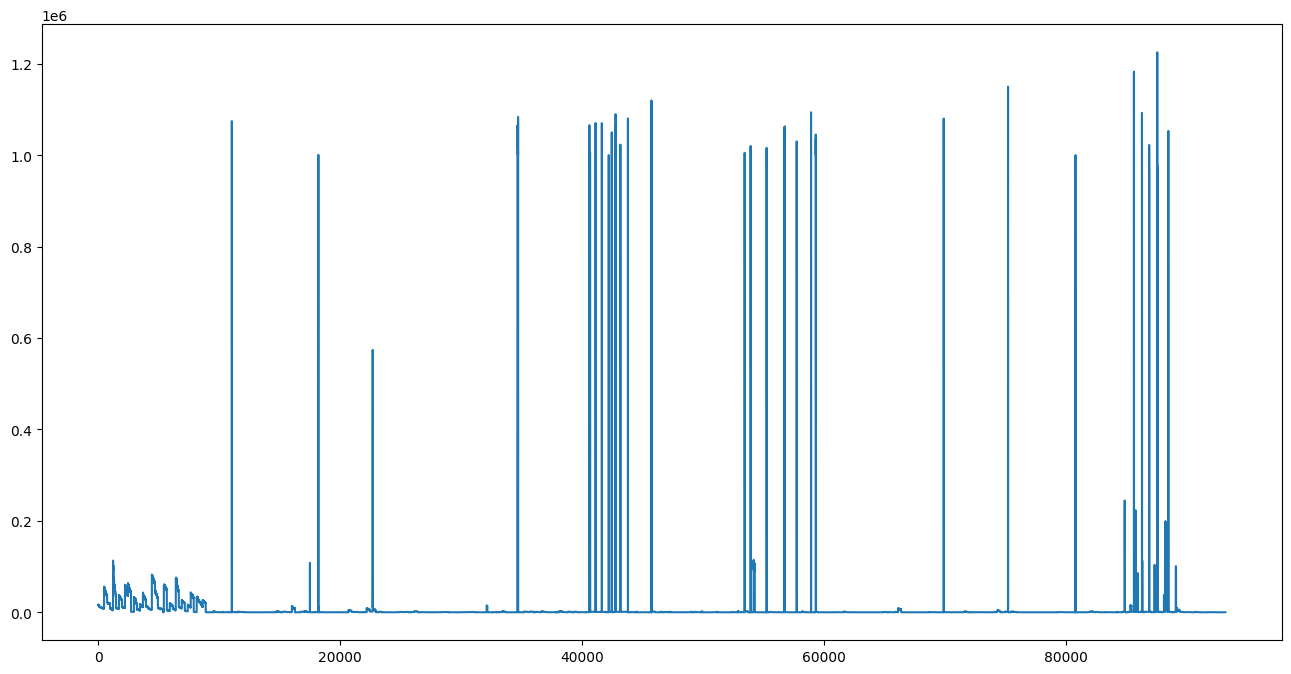

In [4]:
plt.figure(figsize=(16,8))
plt.plot(data['Close'], label="Closing Price")

In [5]:
data['Open - Close']= data['Open'] - data['Close']
data['High - Low'] = data['High'] - data['Low']
data = data.dropna()

In [6]:
X = data[['Open - Close', 'High - Low']]
X.head()

,Open - Close,High - Low
0,-12.61,152.22
1,164.36,255.99
2,89.29,148.27
3,-10.52,93.34
4,92.21,103.33


In [7]:
Y = np.where(data['Close'].shift(-1)>data['Close'],1,-1)

In [8]:
Y

array([-1,  1,  1, ..., -1,  1, -1], shape=(93170,))

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state = 44)

In [10]:
#Implemenatation of KNN Classifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# using gridsearch to find the best parameter
params = {'n_neighbors': [2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn = neighbors.KNeighborsClassifier()
model = GridSearchCV(knn, params, cv=5)

# fit the model
model.fit(X_train, y_train)

# Accuracy Score
accuracy_train = accuracy_score(y_train, model.predict(X_train))
accuracy_test = accuracy_score(y_test, model.predict(X_test))

print ('Train_data Accuracy: %.2f' %accuracy_train)
print ('Test_data Accuracy: %.2f' %accuracy_test)


Train_data Accuracy: 0.77
Test_data Accuracy: 0.75


In [11]:
prediction_classification = model.predict(X_test)

In [12]:
actual_predicted_data=pd.DataFrame({'Actual Class':y_test, 'Predicted Class':prediction_classification})

In [13]:
actual_predicted_data.head(10)

,Actual Class,Predicted Class
0,1,-1
1,-1,-1
2,-1,-1
3,-1,-1
4,1,1
5,-1,-1
6,1,1
7,-1,-1
8,-1,1
9,1,1


In [14]:
y = data['Close']
y

0        15893.77
1        15798.70
2        15939.95
3        15982.62
4        15932.11
           ...   
93165       11.84
93166       12.07
93167       12.15
93168       12.06
93169       12.10
Name: Close, Length: 93170, dtype: float64

In [15]:
import pickle

model_data = {
    "model": knn,
    "features": ['Open', 'High', 'Low']  # example, use actual feature list
}

with open("knn_model.pkl", "wb") as f:
    pickle.dump(model_data, f)
